In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.imshow()

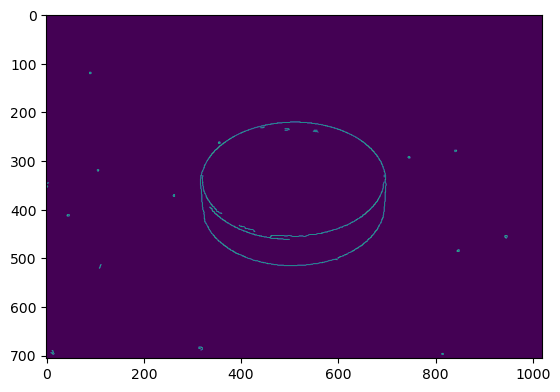

In [8]:
edges = canny(image_gray, sigma=1)
plt.imshow(edges)

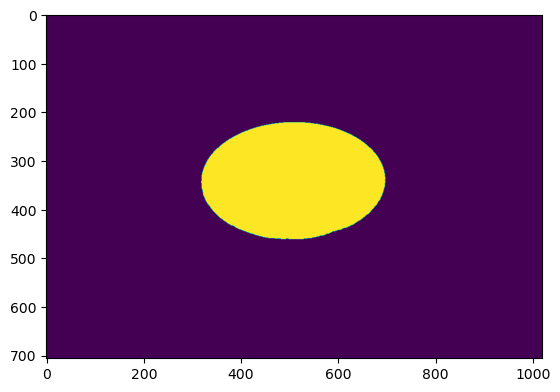

In [2]:
img_exp1 = "Data/EthylPalmitate/Pictures/NatelPhoto.jpeg"
# Load RGB image
RGB = cv2.imread(img_exp1)

# Convert to grayscale
gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)

# Blur the image to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_,binary = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(binary)

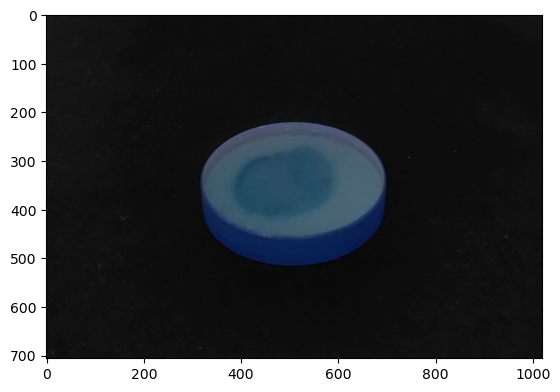

In [3]:
plt.imshow(RGB)

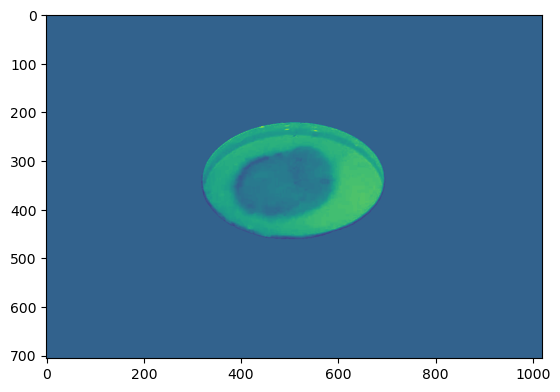

In [7]:
delta = gray.copy()
delta[binary==0]=60
plt.imshow(delta)

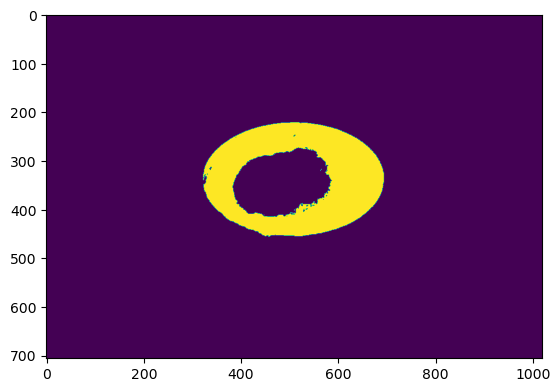

In [8]:
_,binaryD = cv2.threshold(delta,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(binaryD)

In [22]:
AR = (np.sum(binary)-np.sum(binaryD))/np.sum(binary)
AR

0.3393298947456703

In [20]:
from RGB_Collection_area import AreaRatio2Diameter

In [23]:
AreaRatio2Diameter(AR)

14.796015507362672

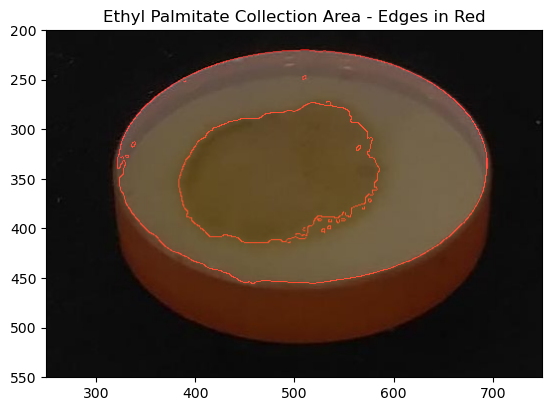

In [66]:
from skimage.feature import canny
import numpy as np
import matplotlib.pyplot as plt

img_exp1 = "Data/EthylPalmitate/Pictures/NatelPhoto.jpeg"
# Load RGB image
RGB = cv2.imread(img_exp1)

# Convert to grayscale
gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
# Blur the image to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#Get a first binary image resulting in the crystal area
_,binary = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#Setting outside values to  60
delta = gray.copy()
delta[binary==0]=60
#Recompute a new binary
_,binaryD = cv2.threshold(delta,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply Canny edge detection on the grayscale image
edges = canny(binaryD)

# Create a mask with the same shape as the RGB image
mask = np.zeros_like(RGB)

# Set the edge locations in the mask to True
mask[edges] = [1, 0, 0]  # [1, 0, 0] corresponds to red color

# Overlay the edges on the RGB image
result = np.where(mask==0, RGB[:,:,::-1], [255,0,0])

# Plot the original image and the modified image
fig, axs = plt.subplots(1, 1)
axs.set_xlim([250,750])
axs.set_ylim([550,200])
axs.imshow(result)
axs.set_title('Ethyl Palmitate Collection Area - Edges in Red')
plt.savefig("Data/EthylPalmitate/OUTPUT/EdgesPicture.jpg")
plt.show()
